## Observations and Insights

## Dependencies and starter code

In [ ]:
#Observation
# Ramicane drug showed the lowest final tumor volumes with Capomulin coming in second with the usage being about the same.
# Ramicane will probably be a better drug treatment vs. Capomulin.
# With a correlation coefficient of .084 the mouse weight and average tumor volume for the Capomulin regimen has a very strong positive relationship.
# The drug regimen, Infubinol, had outliers out of the four most promising treatment regimens.  These outliers may have skewed the calculations and results.
# The distribution of male and female mice were almost 50-50, this maybe done to make sure that drugs are tested across both sexes.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
from scipy.stats import sem
import sklearn.datasets as dta
from scipy.stats import linregress


# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
animal_study_data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
animal_study_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


Summary statistics

In [2]:
drug_tumor = animal_study_data[['Drug Regimen','Tumor Volume (mm3)']]
drug_tumor

,Drug Regimen,Tumor Volume (mm3)
0,Ramicane,45.000000
1,Ramicane,38.825898
2,Ramicane,35.014271
3,Ramicane,34.223992
4,Ramicane,32.997729
...,...,...
1888,Naftisol,63.145652
1889,Naftisol,65.841013
1890,Naftisol,69.176246
1891,Naftisol,70.314904


In [3]:
mean = drug_tumor.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
median = drug_tumor.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
variance = drug_tumor.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
std = drug_tumor.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
sem = drug_tumor.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
summary_table = pd.DataFrame({"Mean":mean,
                              "Median": median,
                              "Variance": variance,
                              "Standard Deviation": std,
                              "Standard of Error": sem})
summary_table

,Mean,Median,Variance,Standard Deviation,Standard of Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,40.675741
Ceftamin,52.591172,51.776157,39.290177,6.268188,52.591172
Infubinol,52.884795,51.820584,43.128684,6.567243,52.884795
Ketapril,55.235638,53.698743,68.553577,8.279709,55.235638
Naftisol,54.331565,52.509285,66.173479,8.134708,54.331565
Placebo,54.033581,52.288934,61.168083,7.821003,54.033581
Propriva,52.322552,50.854632,42.351070,6.507770,52.322552
Ramicane,40.216745,40.673236,23.486704,4.846308,40.216745
Stelasyn,54.233149,52.431737,59.450562,7.710419,54.233149


 Bar plots

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

treatment_regimen = animal_study_data.groupby('Drug Regimen')

count_treatments = treatment_regimen['Drug Regimen'].count()

count_treatments


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Drug Regimen, dtype: int64

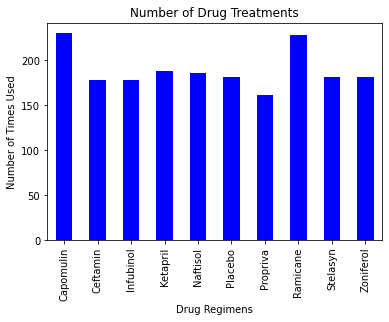

<Figure size 432x288 with 0 Axes>

In [5]:

count_chart = count_treatments.plot(kind='bar', color="blue")

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Drug Regimens")
count_chart.set_ylabel("Number of Times Used")
plt.title("Number of Drug Treatments")

plt.show()
plt.tight_layout()

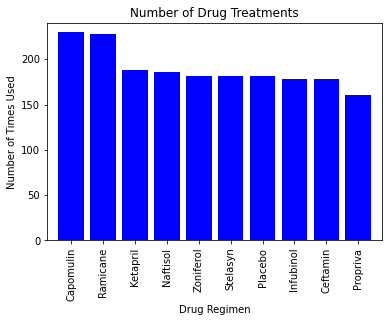

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

num_treatments = animal_study_data["Drug Regimen"].value_counts()
treatments = animal_study_data["Drug Regimen"].value_counts().keys()

x_axis = np.arange(0, len(treatments))
# tick_locations = [x for x in x_axis]
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title("Number of Drug Treatments")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Times Used")

plt.xlim(-0.75, len(x_axis)-.25)
plt.ylim(0, max(num_treatments)+10)

plt.bar(x_axis, num_treatments, facecolor="blue", alpha=1, align="center")
plt.xticks(tick_locations, treatments)
plt.xticks(rotation=90)
plt.show()


## Pie plots

In [7]:
mice_gender= animal_study_data['Sex'].value_counts()
mice_gender

Male      958
Female    935
Name: Sex, dtype: int64

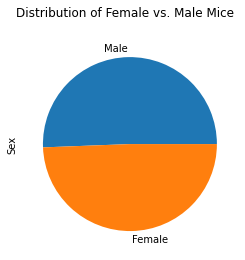

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

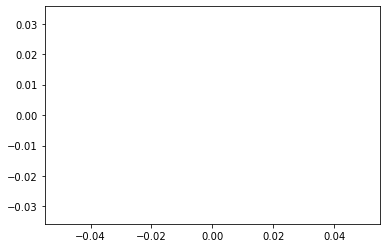

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender= animal_study_data['Sex'].value_counts()

mice_gender_pie = mice_gender.plot(kind="pie", subplots=True, title=("Distribution of Female vs. Male Mice"))

plt.show()
plt.tight_layout()
plt.axis("equal")

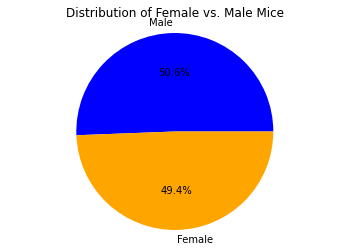

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = animal_study_data["Sex"].value_counts().keys()
sex_count = animal_study_data["Sex"].value_counts()

# Create 2 arrays that contains the colres and the distance for each slice
colors = ["blue","orange"]
explode = (0,0)

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(sex_count, explode=explode, labels=sex, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=360)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title("Distribution of Female vs. Male Mice")
plt.show()

## Quartiles, outliers and boxplots

In [10]:
#Get data
tumor_vol = animal_study_data[['Mouse ID','Drug Regimen','Timepoint','Tumor Volume (mm3)']]
tumor_vol.head(50)

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,k403,Ramicane,0,45.000000
1,k403,Ramicane,5,38.825898
2,k403,Ramicane,10,35.014271
3,k403,Ramicane,15,34.223992
4,k403,Ramicane,20,32.997729
5,k403,Ramicane,25,33.464577
6,k403,Ramicane,30,31.099498
7,k403,Ramicane,35,26.546993
8,k403,Ramicane,40,24.365505
9,k403,Ramicane,45,22.050126


In [11]:
#Get data across the most promising treatment regimens:Capomulin, Ramicane, Infubinol, and Ceftamin.

promising_trt = tumor_vol.loc[(tumor_vol['Drug Regimen']=="Capomulin") |(tumor_vol['Drug Regimen']=="Ramicane") |
(tumor_vol['Drug Regimen']=="Infubinol") | (tumor_vol['Drug Regimen']=="Ceftamin"),:]
promising_trt

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,k403,Ramicane,0,45.000000
1,k403,Ramicane,5,38.825898
2,k403,Ramicane,10,35.014271
3,k403,Ramicane,15,34.223992
4,k403,Ramicane,20,32.997729
...,...,...,...,...
1868,z581,Infubinol,25,54.316407
1869,z581,Infubinol,30,56.286750
1870,z581,Infubinol,35,58.628399
1871,z581,Infubinol,40,60.053740


In [13]:
#Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: 
sorted_final_tumor = promising_trt.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
final_tumor = sorted_final_tumor.loc[sorted_final_tumor.reindex().groupby(['Mouse ID','Drug Regimen'])['Timepoint'].idxmax(),:]
final_tumor = final_tumor.rename(columns={"Tumor Volume (mm3)": "Final Tumor Volume"})
final_tumor


,Mouse ID,Drug Regimen,Timepoint,Final Tumor Volume
463,a203,Infubinol,45,67.973419
473,a251,Infubinol,45,65.525743
493,a275,Ceftamin,45,62.999356
327,a411,Ramicane,45,38.407618
430,a444,Ramicane,45,43.047543
...,...,...,...,...
1845,y769,Ceftamin,45,68.594745
124,y793,Capomulin,45,31.896238
1855,y865,Ceftamin,45,64.729837
84,z578,Ramicane,45,30.638696


In [14]:
cap_tumor_data = final_tumor.loc[final_tumor['Drug Regimen'] == 'Capomulin']['Final Tumor Volume'].reset_index()
cap_tumor_data = cap_tumor_data.sort_values(["Final Tumor Volume"], ascending=True).reset_index()
cap_tumor_data = cap_tumor_data["Final Tumor Volume"]
cap_tumor_data

0     23.343598
1     28.430964
2     28.484033
3     30.485985
4     31.023923
5     31.896238
6     32.377357
7     33.329098
8     34.455298
9     36.041047
10    37.074024
11    37.311846
12    38.125164
13    38.753265
14    38.846876
15    38.939633
16    38.982878
17    39.952347
18    40.159220
19    40.658124
20    40.728578
21    41.483008
22    41.581521
23    46.539206
24    47.685963
Name: Final Tumor Volume, dtype: float64

In [15]:
quartiles = cap_tumor_data.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of final tumor volumes is: {lowerq}")
print(f"The upper quartile of final tumor volumes is: {upperq}")
print(f"The interquartile range of final tumor volumes is: {iqr}")
print(f"The median of final tumor volumes is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of final tumor volumes is: 32.37735684
The upper quartile of final tumor volumes is: 40.1592203
The interquartile range of final tumor volumes is: 7.781863460000004
The median of final tumor volumes is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [16]:
cef_tumor_data = final_tumor.loc[final_tumor['Drug Regimen'] == 'Ceftamin']['Final Tumor Volume'].reset_index()
cef_tumor_data = cef_tumor_data.sort_values(["Final Tumor Volume"], ascending=True).reset_index()
cef_tumor_data = cef_tumor_data["Final Tumor Volume"]
cef_tumor_data

0     45.000000
1     45.000000
2     45.000000
3     45.000000
4     46.784535
5     47.784682
6     48.722078
7     52.925348
8     55.742829
9     56.057749
10    57.918381
11    59.741901
12    59.851956
13    61.386660
14    61.433892
15    61.849023
16    62.999356
17    64.192341
18    64.299830
19    64.634949
20    64.729837
21    67.527482
22    67.748662
23    68.594745
24    68.923185
Name: Final Tumor Volume, dtype: float64

In [17]:
quartiles = cef_tumor_data.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of final tumor volumes is: {lowerq}")
print(f"The upper quartile of final tumor volumes is: {upperq}")
print(f"The interquartile range of final tumor volumes is: {iqr}")
print(f"The median of final tumor volumes is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of final tumor volumes is: 48.72207785
The upper quartile of final tumor volumes is: 64.29983003
The interquartile range of final tumor volumes is: 15.577752179999997
The median of final tumor volumes is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [18]:
ram_tumor_data = final_tumor.loc[final_tumor['Drug Regimen'] == 'Ramicane']['Final Tumor Volume'].reset_index()
ram_tumor_data = ram_tumor_data.sort_values(["Final Tumor Volume"], ascending=True).reset_index()
ram_tumor_data = ram_tumor_data["Final Tumor Volume"]
ram_tumor_data

0     22.050126
1     29.128472
2     30.276232
3     30.564625
4     30.638696
5     31.095335
6     31.560470
7     32.978522
8     33.397653
9     33.562402
10    36.134852
11    36.374510
12    36.561652
13    37.225650
14    37.311236
15    38.342008
16    38.407618
17    38.810366
18    40.659006
19    40.667713
20    43.047543
21    43.166373
22    43.419381
23    44.183451
24    45.220869
Name: Final Tumor Volume, dtype: float64

In [19]:
quartiles = ram_tumor_data.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of final tumor volumes is: {lowerq}")
print(f"The upper quartile of final tumor volumes is: {upperq}")
print(f"The interquartile range of final tumor volumes is: {iqr}")
print(f"The median of final tumor volumes is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of final tumor volumes is: 31.56046955
The upper quartile of final tumor volumes is: 40.65900627
The interquartile range of final tumor volumes is: 9.098536719999998
The median of final tumor volumes is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [20]:
inf_tumor_data = final_tumor.loc[final_tumor['Drug Regimen'] == 'Infubinol']['Final Tumor Volume'].reset_index()
inf_tumor_data = inf_tumor_data.sort_values(["Final Tumor Volume"], ascending=True).reset_index()
inf_tumor_data = inf_tumor_data["Final Tumor Volume"]
inf_tumor_data

0     36.321346
1     45.699331
2     46.250112
3     47.010364
4     50.005138
5     51.542431
6     54.048608
7     54.656549
8     55.629428
9     55.650681
10    57.031862
11    58.268442
12    60.165180
13    60.918767
14    60.969711
15    62.117279
16    62.435404
17    62.754451
18    65.525743
19    66.083066
20    66.196912
21    67.289621
22    67.685569
23    67.973419
24    72.226731
Name: Final Tumor Volume, dtype: float64

In [21]:
quartiles = inf_tumor_data.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of final tumor volumes is: {lowerq}")
print(f"The upper quartile of final tumor volumes is: {upperq}")
print(f"The interquartile range of final tumor volumes is: {iqr}")
print(f"The median of final tumor volumes is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of final tumor volumes is: 54.04860769
The upper quartile of final tumor volumes is: 65.52574285
The interquartile range of final tumor volumes is: 11.477135160000003
The median of final tumor volumes is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


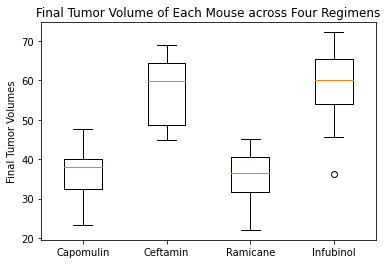

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

regimens = ["Capomulin","Ceftamin","Ramicane","Infubinol"]

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume of Each Mouse across Four Regimens')
ax1.set_ylabel('Final Tumor Volumes')
plt.boxplot ([cap_tumor_data,cef_tumor_data,ram_tumor_data,inf_tumor_data])
ax1.set_xticklabels(regimens)

plt.show()

## Line and scatter plots

In [23]:
#Get Mouse ID, Tumor Volume, and Timepoint for mice on drug Capomulin
time_volume = animal_study_data.loc[animal_study_data['Drug Regimen']=="Capomulin",["Mouse ID","Tumor Volume (mm3)","Timepoint"]]
time_volume

,Mouse ID,Tumor Volume (mm3),Timepoint
10,s185,45.000000,0
11,s185,43.878496,5
12,s185,37.614948,10
13,s185,38.177232,15
14,s185,36.866876,20
...,...,...,...
440,i557,47.685963,45
1452,r157,45.000000,0
1453,r157,45.597064,5
1454,r157,46.059608,10


In [24]:
#Get data for a single mouse.  Mouse ID r157
one_mouse = time_volume.loc[(time_volume['Mouse ID']=="i557"),:]
one_mouse

,Mouse ID,Tumor Volume (mm3),Timepoint
431,i557,45.000000,0
432,i557,42.261665,5
433,i557,42.992077,10
434,i557,43.529876,15
435,i557,43.967895,20
436,i557,44.596219,25
437,i557,45.261384,30
438,i557,45.941949,35
439,i557,46.821070,40
440,i557,47.685963,45


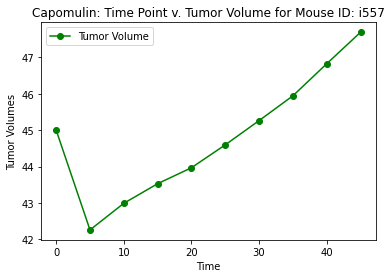

In [25]:
#Generate a line plot of time point versus tumor volume for a single mouse treated with Capomulin.

plt.plot(one_mouse['Timepoint'],one_mouse['Tumor Volume (mm3)'], color="green",marker="o", label="Tumor Volume" )

plt.legend(loc="best")

plt.title("Capomulin: Time Point v. Tumor Volume for Mouse ID: i557")
plt.xlabel("Time")
plt.ylabel("Tumor Volumes")
plt.show()



In [26]:
avg_vol = animal_study_data.loc[animal_study_data['Drug Regimen']=="Capomulin",["Mouse ID","Tumor Volume (mm3)","Weight (g)"]]
avg_vol

,Mouse ID,Tumor Volume (mm3),Weight (g)
10,s185,45.000000,17
11,s185,43.878496,17
12,s185,37.614948,17
13,s185,38.177232,17
14,s185,36.866876,17
...,...,...,...
440,i557,47.685963,24
1452,r157,45.000000,25
1453,r157,45.597064,25
1454,r157,46.059608,25


In [27]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
average_tumor_vol = pd.DataFrame(avg_vol.groupby(['Mouse ID','Weight (g)'])['Tumor Volume (mm3)'].mean()).reset_index()
average_tumor_vol = average_tumor_vol.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
average_tumor_vol = average_tumor_vol.set_index('Mouse ID')
average_tumor_vol

,Weight (g),Average Volume
Mouse ID,,
b128,22,41.963636
b742,21,40.083699
f966,17,36.505973
g288,19,41.990097
g316,22,44.613344
i557,24,44.805810
i738,20,39.141053
j119,23,44.465236
j246,21,43.216925


Text(0, 0.5, 'Average Tumor Volume')

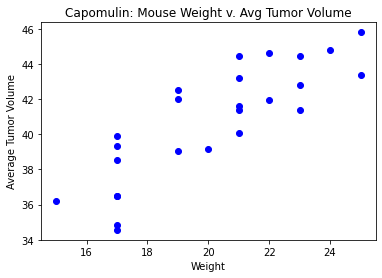

In [28]:
plt.scatter(average_tumor_vol['Weight (g)'],average_tumor_vol['Average Volume'],marker="o", facecolors="blue", edgecolors="blue")

plt.title("Capomulin: Mouse Weight v. Avg Tumor Volume")
plt.xlabel("Weight")
plt.ylabel("Average Tumor Volume")

In [29]:
# Calculate the correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen
print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen {round(sts.pearsonr(average_tumor_vol['Weight (g)'],average_tumor_vol['Average Volume'])[0],2)}")

The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen 0.84


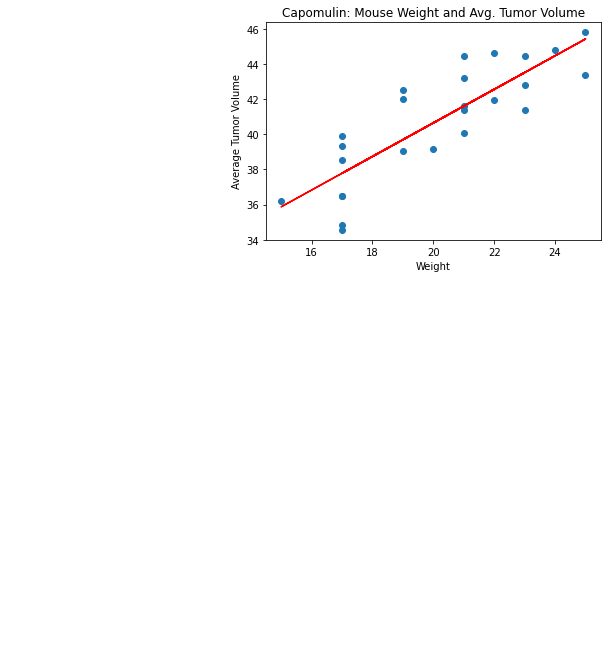

In [31]:
# Calculate the linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = average_tumor_vol['Weight (g)']
y_values = average_tumor_vol['Average Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight')
plt.ylabel('Average Tumor Volume')
plt.title("Capomulin: Mouse Weight and Avg. Tumor Volume")
plt.show()